Data Processing - Project BMW

In [2]:
#Importamos las librerias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
#Leemos el archivo CSV con los datos tratados.
df_bmw= pd.read_csv('/Users/ericaj/Desktop/GENERAL/ProyectosDs/Project_CleaningProcessing_BMW/bmw_clean.csv')

In [4]:
df_bmw.head()

,Unnamed: 0,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [5]:
del(df_bmw['Unnamed: 0'])

In [7]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834 entries, 0 to 4833
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4834 non-null   object 
 1   km                           4834 non-null   float64
 2   potencia                     4834 non-null   float64
 3   fecha_registro               4834 non-null   object 
 4   tipo_gasolina                4834 non-null   object 
 5   color                        4834 non-null   object 
 6   tipo_coche                   4834 non-null   object 
 7   volante_regulable            4834 non-null   object 
 8   aire_acondicionado           4834 non-null   bool   
 9   camara_trasera               4834 non-null   bool   
 10  asientos_traseros_plegables  4834 non-null   object 
 11  elevalunas_electrico         4834 non-null   object 
 12  bluetooth                    4834 non-null   object 
 13  gps               

In [8]:
df_bmw['fecha_registro']=pd.to_datetime(df_bmw['fecha_registro'])
df_bmw['fecha_venta']=pd.to_datetime(df_bmw['fecha_venta'])

ANALISIS UNIVARIABLE -->

In [10]:
for i in df_bmw:
    print(df_bmw[i].value_counts())

320                750
520                633
318                567
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
140997.0    4
164621.0    2
171792.0    2
106434.0    2
86420.0     2
           ..
87542.0     1
166108.0    1
155538.0    1
96491.0     1
195840.0    1
Name: km, Length: 4774, dtype: int64
135.0    881
120.0    783
85.0     630
100.0    569
105.0    449
        ... 
224.0      1
412.0      1
423.0      1
300.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64
2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-01-01    148
2013-09-01    148
             ... 
2000-07-01      1
2017-11-01      1
2002-09-01      1
2004-12-01      1
2007-12-01      1
Name: fecha_registro, Length: 199, dtype: int64
diesel           4632
petrol            191
hybrid_petrol       8
electro             3

CATEGORIZACIÓN DE VARIABLES -->

In [11]:
target= ['precio']

In [12]:
def obtener_lista_variables(dataset):
  lista_numericas= []
  lista_booleans= []
  lista_categoricas= []
  for i in dataset: 
    if (dataset[i].dtype.kind== 'i' or dataset[i].dtype.kind=='f') and (i not in target) and (len(dataset[i].unique()) !=2):
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind== 'i' or dataset[i].dtype.kind=='f') and (i not in target) and (len(dataset[i].unique())==2):
      lista_booleans.append(i)
    elif (dataset[i].dtype.kind== 'O') and (i not in target):
      lista_categoricas.append(i)


  return lista_numericas, lista_booleans, lista_categoricas

In [14]:
l_num, l_bool, l_cat= obtener_lista_variables(df_bmw)

In [15]:
l_num

['km', 'potencia']

In [16]:
l_bool

[]

In [17]:
l_cat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [18]:
#Logica de las variables.

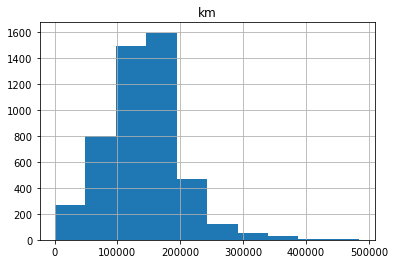

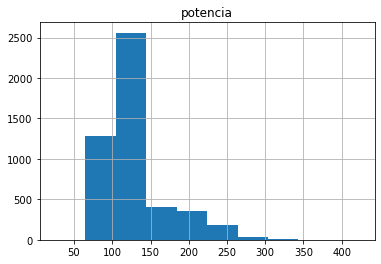

In [19]:
for i in l_num:
    df_bmw.hist(i)

In [20]:
for i in l_cat:
    print(df_bmw[i].value_counts())

320                750
520                633
318                567
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
diesel           4632
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64
black        1627
grey         1171
blue          706
white         536
brown         341
silver        325
red            51
beige          41
green          18
sin_color      12
orange          6
Name: color, dtype: int64
estate            1599
sedan             1167
suv               1056
hatchback          699
subcompact         113
coupe              103
convertible         46
van                 42
sin_tipo_coche       9
Name: tipo_coche, dtype: int64
True                           2658
False                          2172
sin_datos_volante_regulable       4
Name: volante_re

In [21]:
df_bmw2= df_bmw.copy() #Hacemos un checkpoint.